In [1]:
# Библиотеки
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Чтоб числа вещественные выводились норм
pd.options.display.float_format ='{:,.2f}'.format

In [2]:
# sklearn.model_selection.GridSearchCV

**Загружаем данные**

In [3]:
df_2019_full = pd.read_csv('database/df_2019_full.csv')
df_2020_full = pd.read_csv('database/df_2020_full.csv')
df_2021_full = pd.read_csv('database/df_2021_full.csv')

In [4]:
target_2019_01_full = pd.read_csv('database/target_2019_01_full.csv')
target_2019_01_full = target_2019_01_full['target_2019 01']

target_2020_01_full = pd.read_csv('database/target_2020_01_full.csv')
target_2020_01_full = target_2020_01_full['target_2020 01']

target_2021_01_full = pd.read_csv('database/target_2021_01_full.csv')
target_2021_01_full = target_2021_01_full['target_2021 01']


**Считываем файлы со списками признаков**

Создадим словарь, в котором ключи имя файла, а значения:
- fs_zero - список признаков нулевой значимости, отобраный библеотекой Feature selector 
- fs_collinear - список признаков, отобранных для удаленния, имеющие высокую коореляцию
- 'f_for_pastreded_client_2020' - 'f_for_pastreded_client_2021' - признаки клиентов, с которыми долго сотрудничают, т.е. есть по ним такие данные
- остальные - списки признаков, ранжированные разными методами (важные - в начале)



In [5]:
importances_feature_19 = {}

for name_file in os.listdir('feature_list/2019'):
    path_to_file = 'feature_list/2019/' + name_file
    name_file = name_file.strip('.txt')
    file = open(path_to_file, 'r')
    importances_feature_19[name_file] = [line.strip() for line in file]
    file.close()
    
importances_feature_19.keys()

dict_keys(['fs_collinear', 'fs_importances', 'fs_zero', 'f_cl_importances', 'f_lr_importances', 'f_mi_importances', 'f_pi_f1_importances', 'f_pi_ra_importances', 'f_rfe_importances'])

In [6]:
importances_feature_20 = {}

for name_file in os.listdir('feature_list/2020'):
    path_to_file = 'feature_list/2020/' + name_file
    name_file = name_file.strip('.txt')
    file = open('feature_list/2019/f_rfe_importances.txt', 'r')
    importances_feature_20[name_file] = [line.strip() for line in file]
    file.close()
    
importances_feature_20.keys()

dict_keys(['fs_collinear', 'fs_importances', 'fs_zero', 'f_cl_importances', 'f_lr_importances', 'f_mi_importances', 'f_pi_f1_importances', 'f_pi_ra_importances', 'f_rfe_importances'])

In [7]:
# Считаем список признаков для клиентов, которыми давно работают
file = open('feature_list/f_for_pastreded_client.txt', 'r')
list_f_for_pastreded_client = [line.strip() for line in file]
file.close()

**Тестирование разных моделей ML**

In [8]:
# Импортирование необходимых модулей и атрибутов
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, f1_score

Линейные алгоритмы:

    — Логистическая регрессия* / Logistic Regression (‘LR’)
    — Линейный дискриминантный анализ / Linear Discriminant Analysis (‘LDA’)

Нелинейные алгоритмы:

    — Метод k-ближайших соседей (классификация) / K-Neighbors Classifier (‘KNN’)
    — Деревья принятия решений / Decision Tree Classifier (‘CART’)
    — Наивный классификатор Байеса / Naive Bayes Classifier (‘NB’)
    — Линейный метод опорных векторов (классификация) / Linear Support Vector Classification (‘LSVC’)
    — Метод опорных векторов (классификация) / C-Support Vector Classification (‘SVC’)

Алгоритм искусственной нейронной сети:

    — Многослойный персептрон / Multilayer Perceptrons (‘MLP’)

Ансамблевые алгоритмы:

    — Bagging (классификация) / Bagging Classifier (‘BG’) (Bagging = Bootstrap aggregating)
    — Случайный лес (классификация) / Random Forest Classifier (‘RF’)
    — Экстра-деревья (классификация) / Extra Trees Classifier (‘ET’)
    — AdaBoost (классификация) / AdaBoost Classifier (‘AB’) (AdaBoost = Adaptive Boosting)
    — Градиентный boosting (классификация) / Gradient Boosting Classifier (‘GB’)

Таким образом, список ‘models’ содержит следующие модели:


In [9]:
# На будущее автоматизировать функцию ml_tester
# models = []
# models.append(('LR', LogisticRegression()))
# models.append(('LDA', LinearDiscriminantAnalysis()))
# models.append(('KNN', KNeighborsClassifier()))
# models.append(('CART', DecisionTreeClassifier(random_state=42)))
# models.append(('NB', GaussianNB()))
# models.append(('LSVC', LinearSVC(random_state=42)))
# models.append(('SVC', SVC(random_state=42)))
# models.append(('MLP', MLPClassifier(random_state=42)))
# models.append(('BG', BaggingClassifier(n_estimators=100, random_state=42)))
# models.append(('RF', RandomForestClassifier(n_estimators=100, random_state=42)))
# models.append(('ET', ExtraTreesClassifier(n_estimators=100, random_state=42)))
# models.append(('AB', AdaBoostClassifier(n_estimators=100, algorithm='SAMME', random_state=42)))
# models.append(('GB', GradientBoostingClassifier(n_estimators=100, random_state=42)))

In [10]:
def metrics(y_test, y_pred):
    """Комплексный расчет метрик"""
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred).round(4)
    recall = recall_score(y_test, y_pred).round(4)
    roc_auc = roc_auc_score(y_test, y_pred).round(4)
    f1 = f1_score(y_test, y_pred).round(4)
    
    # Если необходимо вывести метрики на печать - раскомментировать
    #print('Матрица:')
    #print(conf_matrix)
    #print('точность (precision) - ', precision)
    #print('полнота (recall) -', recall)
    #print('roc_auc - ', roc_auc)
    #print('f1_score - ', f1)
    
    return {'conf_matrix': conf_matrix, 'precision': precision, 'recall': recall, 'roc_auc': roc_auc, 'f1': f1}

In [11]:
def ml_train(ml, X_train, X_test, y_train,  y_test):
    """Функция обучает переданную ей модель и считает метрики"""
    ml.fit(X_train, y_train)
    y_pred = ml.predict(X_test)
    return metrics(y_test, y_pred)
   

In [12]:
# Оценивание эффективности выполнения каждого алгоритма

def ml_tester(X_train, X_test, y_train, y_test, features_list):
    """Функция проводит обучение на разных моделях, и возвращает метрики
    feature - список признаков,
    n_feature - количество признаков, которые необходимо взять для обучения модели
    """
    
    X_train = X_train[features_list]
    X_test = X_test[features_list]
    
    metrixs_list = {}
    
    # Список моделей машинного обучения
    ml_LR = LogisticRegression( max_iter=2000, random_state=42)
    metrixs_list['ml_LR'] = ml_train(ml_LR, X_train, X_test, y_train, y_test)
    
    ml_LDA = LinearDiscriminantAnalysis()
    metrixs_list['ml_LDA'] = ml_train(ml_LDA, X_train, X_test, y_train, y_test)
    
    ml_KNN = KNeighborsClassifier()
    metrixs_list['ml_KNN'] = ml_train(ml_KNN, X_train, X_test, y_train, y_test)
    
    ml_CART = DecisionTreeClassifier(random_state=42)
    metrixs_list['ml_CART'] = ml_train(ml_CART, X_train, X_test, y_train, y_test)
    
    ml_NB = GaussianNB()
    metrixs_list['ml_NB'] = ml_train(ml_NB, X_train, X_test, y_train, y_test)
    
    ml_LSVC = LinearSVC(max_iter=100000, random_state=42)
    metrixs_list['ml_LSVC'] = ml_train(ml_LSVC, X_train, X_test, y_train, y_test)
    
    ml_SVC = SVC(random_state=42)
    metrixs_list['ml_SVC'] = ml_train(ml_SVC, X_train, X_test, y_train, y_test)
    
    ml_MLP = MLPClassifier(max_iter=2000, random_state=42)
    metrixs_list['ml_MLP'] = ml_train(ml_MLP, X_train, X_test, y_train, y_test)
    
    ml_BG = BaggingClassifier(n_estimators=100, random_state=42)
    metrixs_list['ml_BG'] = ml_train(ml_BG, X_train, X_test, y_train, y_test)
    
    ml_RF = RandomForestClassifier(n_estimators=100, random_state=42)
    metrixs_list['ml_RF'] = ml_train(ml_RF, X_train, X_test, y_train, y_test)
    
    ml_ET = ExtraTreesClassifier(n_estimators=100, random_state=42)
    metrixs_list['ml_ET'] = ml_train(ml_ET, X_train, X_test, y_train, y_test)
    
    ml_AB = AdaBoostClassifier(n_estimators=100, algorithm='SAMME', random_state=42)
    metrixs_list['ml_AB'] = ml_train(ml_AB, X_train, X_test, y_train, y_test)
    
    ml_GB = GradientBoostingClassifier(n_estimators=100, random_state=42)
    metrixs_list['ml_GB'] = ml_train(ml_GB, X_train, X_test, y_train, y_test)

    return metrixs_list


**Проведем тест обучения разных моделей ML разных наборах признаков.**

Обучаем на df_2019 - тестим на df_2020 & Обучаем на df_2020 - тестим на df_2021

In [13]:
features_list = ['f_cl_importances', 'f_lr_importances', 'f_mi_importances', 'f_pi_f1_importances',
                 'f_pi_ra_importances', 'f_rfe_importances', 'fs_importances']
n = 45 # Количество признаков

ml_test_dict = {} # Словарь с метриками. Ключ: название метрики, Значение: Датафрейм с метриками

for feature in  features_list:
    print(f'Обучение на отборе {n} признаков из {feature}')
    metrixs_19_20 = ml_tester(df_2019_full, df_2020_full, target_2019_01_full, target_2020_01_full, 
                          importances_feature_19[feature][:n])
    metrixs_20_21 = ml_tester(df_2020_full, df_2021_full, target_2020_01_full, target_2021_01_full, 
                          importances_feature_20[feature][:n])
    
    df_metrixs_19_20 = pd.DataFrame(metrixs_19_20).T
    df_metrixs_20_21 = pd.DataFrame(metrixs_20_21).T
    df_metrixs_concatf = pd.concat([df_metrixs_19_20, df_metrixs_20_21], axis=1)
    ml_test_dict[feature] = df_metrixs_concatf
    display(df_metrixs_concatf)

Обучение на отборе 45 признаков из f_cl_importances


D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,conf_matrix,precision,recall,roc_auc,f1,conf_matrix,precision,recall,roc_auc,f1
ml_LR,"[[27, 51], [51, 196]]",0.79,0.79,0.57,0.79,"[[11, 203], [17, 94]]",0.32,0.85,0.45,0.46
ml_LDA,"[[25, 53], [54, 193]]",0.78,0.78,0.55,0.78,"[[11, 203], [23, 88]]",0.30,0.79,0.42,0.44
ml_KNN,"[[32, 46], [74, 173]]",0.79,0.70,0.56,0.74,"[[22, 192], [18, 93]]",0.33,0.84,0.47,0.47
ml_CART,"[[44, 34], [110, 137]]",0.80,0.55,0.56,0.66,"[[46, 168], [30, 81]]",0.33,0.73,0.47,0.45
ml_NB,"[[11, 67], [23, 224]]",0.77,0.91,0.52,0.83,"[[11, 203], [32, 79]]",0.28,0.71,0.38,0.40
ml_LSVC,"[[25, 53], [55, 192]]",0.78,0.78,0.55,0.78,"[[10, 204], [21, 90]]",0.31,0.81,0.43,0.44
ml_SVC,"[[13, 65], [29, 218]]",0.77,0.88,0.52,0.82,"[[1, 213], [4, 107]]",0.33,0.96,0.48,0.50
ml_MLP,"[[34, 44], [82, 165]]",0.79,0.67,0.55,0.72,"[[27, 187], [24, 87]]",0.32,0.78,0.46,0.45
ml_BG,"[[33, 45], [70, 177]]",0.80,0.72,0.57,0.75,"[[22, 192], [21, 90]]",0.32,0.81,0.46,0.46
ml_RF,"[[25, 53], [66, 181]]",0.77,0.73,0.53,0.75,"[[14, 200], [17, 94]]",0.32,0.85,0.46,0.46


Обучение на отборе 45 признаков из f_lr_importances


D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,conf_matrix,precision,recall,roc_auc,f1,conf_matrix,precision,recall,roc_auc,f1
ml_LR,"[[29, 49], [66, 181]]",0.79,0.73,0.55,0.76,"[[11, 203], [17, 94]]",0.32,0.85,0.45,0.46
ml_LDA,"[[32, 46], [68, 179]]",0.80,0.72,0.57,0.76,"[[11, 203], [23, 88]]",0.30,0.79,0.42,0.44
ml_KNN,"[[29, 49], [63, 184]]",0.79,0.74,0.56,0.77,"[[22, 192], [18, 93]]",0.33,0.84,0.47,0.47
ml_CART,"[[38, 40], [108, 139]]",0.78,0.56,0.53,0.65,"[[46, 168], [30, 81]]",0.33,0.73,0.47,0.45
ml_NB,"[[11, 67], [32, 215]]",0.76,0.87,0.51,0.81,"[[11, 203], [32, 79]]",0.28,0.71,0.38,0.40
ml_LSVC,"[[31, 47], [69, 178]]",0.79,0.72,0.56,0.75,"[[10, 204], [21, 90]]",0.31,0.81,0.43,0.44
ml_SVC,"[[9, 69], [28, 219]]",0.76,0.89,0.50,0.82,"[[1, 213], [4, 107]]",0.33,0.96,0.48,0.50
ml_MLP,"[[39, 39], [79, 168]]",0.81,0.68,0.59,0.74,"[[27, 187], [24, 87]]",0.32,0.78,0.46,0.45
ml_BG,"[[29, 49], [62, 185]]",0.79,0.75,0.56,0.77,"[[22, 192], [21, 90]]",0.32,0.81,0.46,0.46
ml_RF,"[[28, 50], [55, 192]]",0.79,0.78,0.57,0.79,"[[14, 200], [17, 94]]",0.32,0.85,0.46,0.46


Обучение на отборе 45 признаков из f_mi_importances


D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,conf_matrix,precision,recall,roc_auc,f1,conf_matrix,precision,recall,roc_auc,f1
ml_LR,"[[31, 47], [61, 186]]",0.80,0.75,0.58,0.78,"[[11, 203], [17, 94]]",0.32,0.85,0.45,0.46
ml_LDA,"[[30, 48], [59, 188]]",0.80,0.76,0.57,0.78,"[[11, 203], [23, 88]]",0.30,0.79,0.42,0.44
ml_KNN,"[[24, 54], [66, 181]]",0.77,0.73,0.52,0.75,"[[22, 192], [18, 93]]",0.33,0.84,0.47,0.47
ml_CART,"[[33, 45], [95, 152]]",0.77,0.62,0.52,0.68,"[[46, 168], [30, 81]]",0.33,0.73,0.47,0.45
ml_NB,"[[28, 50], [64, 183]]",0.79,0.74,0.55,0.76,"[[11, 203], [32, 79]]",0.28,0.71,0.38,0.40
ml_LSVC,"[[27, 51], [55, 192]]",0.79,0.78,0.56,0.78,"[[10, 204], [21, 90]]",0.31,0.81,0.43,0.44
ml_SVC,"[[1, 77], [4, 243]]",0.76,0.98,0.50,0.86,"[[1, 213], [4, 107]]",0.33,0.96,0.48,0.50
ml_MLP,"[[34, 44], [93, 154]]",0.78,0.62,0.53,0.69,"[[27, 187], [24, 87]]",0.32,0.78,0.46,0.45
ml_BG,"[[32, 46], [63, 184]]",0.80,0.74,0.58,0.77,"[[22, 192], [21, 90]]",0.32,0.81,0.46,0.46
ml_RF,"[[31, 47], [60, 187]]",0.80,0.76,0.58,0.78,"[[14, 200], [17, 94]]",0.32,0.85,0.46,0.46


Обучение на отборе 45 признаков из f_pi_f1_importances


D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,conf_matrix,precision,recall,roc_auc,f1,conf_matrix,precision,recall,roc_auc,f1
ml_LR,"[[27, 51], [63, 184]]",0.78,0.74,0.55,0.76,"[[11, 203], [17, 94]]",0.32,0.85,0.45,0.46
ml_LDA,"[[25, 53], [58, 189]]",0.78,0.77,0.54,0.77,"[[11, 203], [23, 88]]",0.30,0.79,0.42,0.44
ml_KNN,"[[31, 47], [69, 178]]",0.79,0.72,0.56,0.75,"[[22, 192], [18, 93]]",0.33,0.84,0.47,0.47
ml_CART,"[[39, 39], [96, 151]]",0.79,0.61,0.56,0.69,"[[46, 168], [30, 81]]",0.33,0.73,0.47,0.45
ml_NB,"[[21, 57], [46, 201]]",0.78,0.81,0.54,0.80,"[[11, 203], [32, 79]]",0.28,0.71,0.38,0.40
ml_LSVC,"[[25, 53], [69, 178]]",0.77,0.72,0.52,0.74,"[[10, 204], [21, 90]]",0.31,0.81,0.43,0.44
ml_SVC,"[[4, 74], [2, 245]]",0.77,0.99,0.52,0.87,"[[1, 213], [4, 107]]",0.33,0.96,0.48,0.50
ml_MLP,"[[31, 47], [101, 146]]",0.76,0.59,0.49,0.66,"[[27, 187], [24, 87]]",0.32,0.78,0.46,0.45
ml_BG,"[[31, 47], [77, 170]]",0.78,0.69,0.54,0.73,"[[22, 192], [21, 90]]",0.32,0.81,0.46,0.46
ml_RF,"[[25, 53], [64, 183]]",0.78,0.74,0.53,0.76,"[[14, 200], [17, 94]]",0.32,0.85,0.46,0.46


Обучение на отборе 45 признаков из f_pi_ra_importances


D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,conf_matrix,precision,recall,roc_auc,f1,conf_matrix,precision,recall,roc_auc,f1
ml_LR,"[[25, 53], [54, 193]]",0.78,0.78,0.55,0.78,"[[11, 203], [17, 94]]",0.32,0.85,0.45,0.46
ml_LDA,"[[23, 55], [52, 195]]",0.78,0.79,0.54,0.78,"[[11, 203], [23, 88]]",0.30,0.79,0.42,0.44
ml_KNN,"[[32, 46], [68, 179]]",0.80,0.72,0.57,0.76,"[[22, 192], [18, 93]]",0.33,0.84,0.47,0.47
ml_CART,"[[38, 40], [98, 149]]",0.79,0.60,0.55,0.68,"[[46, 168], [30, 81]]",0.33,0.73,0.47,0.45
ml_NB,"[[18, 60], [47, 200]]",0.77,0.81,0.52,0.79,"[[11, 203], [32, 79]]",0.28,0.71,0.38,0.40
ml_LSVC,"[[23, 55], [54, 193]]",0.78,0.78,0.54,0.78,"[[10, 204], [21, 90]]",0.31,0.81,0.43,0.44
ml_SVC,"[[0, 78], [0, 247]]",0.76,1.00,0.50,0.86,"[[1, 213], [4, 107]]",0.33,0.96,0.48,0.50
ml_MLP,"[[36, 42], [88, 159]]",0.79,0.64,0.55,0.71,"[[27, 187], [24, 87]]",0.32,0.78,0.46,0.45
ml_BG,"[[32, 46], [68, 179]]",0.80,0.72,0.57,0.76,"[[22, 192], [21, 90]]",0.32,0.81,0.46,0.46
ml_RF,"[[34, 44], [57, 190]]",0.81,0.77,0.60,0.79,"[[14, 200], [17, 94]]",0.32,0.85,0.46,0.46


Обучение на отборе 45 признаков из f_rfe_importances


D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,conf_matrix,precision,recall,roc_auc,f1,conf_matrix,precision,recall,roc_auc,f1
ml_LR,"[[19, 59], [46, 201]]",0.77,0.81,0.53,0.79,"[[11, 203], [17, 94]]",0.32,0.85,0.45,0.46
ml_LDA,"[[26, 52], [54, 193]]",0.79,0.78,0.56,0.78,"[[11, 203], [23, 88]]",0.30,0.79,0.42,0.44
ml_KNN,"[[29, 49], [68, 179]]",0.79,0.72,0.55,0.75,"[[22, 192], [18, 93]]",0.33,0.84,0.47,0.47
ml_CART,"[[38, 40], [102, 145]]",0.78,0.59,0.54,0.67,"[[46, 168], [30, 81]]",0.33,0.73,0.47,0.45
ml_NB,"[[22, 56], [43, 204]]",0.78,0.83,0.55,0.80,"[[11, 203], [32, 79]]",0.28,0.71,0.38,0.40
ml_LSVC,"[[25, 53], [53, 194]]",0.79,0.79,0.55,0.79,"[[10, 204], [21, 90]]",0.31,0.81,0.43,0.44
ml_SVC,"[[1, 77], [0, 247]]",0.76,1.00,0.51,0.87,"[[1, 213], [4, 107]]",0.33,0.96,0.48,0.50
ml_MLP,"[[25, 53], [46, 201]]",0.79,0.81,0.57,0.80,"[[27, 187], [24, 87]]",0.32,0.78,0.46,0.45
ml_BG,"[[30, 48], [68, 179]]",0.79,0.72,0.55,0.76,"[[22, 192], [21, 90]]",0.32,0.81,0.46,0.46
ml_RF,"[[29, 49], [51, 196]]",0.80,0.79,0.58,0.80,"[[14, 200], [17, 94]]",0.32,0.85,0.46,0.46


Обучение на отборе 45 признаков из fs_importances


D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,conf_matrix,precision,recall,roc_auc,f1,conf_matrix,precision,recall,roc_auc,f1
ml_LR,"[[22, 56], [51, 196]]",0.78,0.79,0.54,0.79,"[[11, 203], [17, 94]]",0.32,0.85,0.45,0.46
ml_LDA,"[[25, 53], [61, 186]]",0.78,0.75,0.54,0.77,"[[11, 203], [23, 88]]",0.30,0.79,0.42,0.44
ml_KNN,"[[28, 50], [89, 158]]",0.76,0.64,0.50,0.69,"[[22, 192], [18, 93]]",0.33,0.84,0.47,0.47
ml_CART,"[[39, 39], [98, 149]]",0.79,0.60,0.55,0.69,"[[46, 168], [30, 81]]",0.33,0.73,0.47,0.45
ml_NB,"[[25, 53], [55, 192]]",0.78,0.78,0.55,0.78,"[[11, 203], [32, 79]]",0.28,0.71,0.38,0.40
ml_LSVC,"[[27, 51], [58, 189]]",0.79,0.77,0.56,0.78,"[[10, 204], [21, 90]]",0.31,0.81,0.43,0.44
ml_SVC,"[[1, 77], [3, 244]]",0.76,0.99,0.50,0.86,"[[1, 213], [4, 107]]",0.33,0.96,0.48,0.50
ml_MLP,"[[40, 38], [95, 152]]",0.80,0.62,0.56,0.70,"[[27, 187], [24, 87]]",0.32,0.78,0.46,0.45
ml_BG,"[[24, 54], [65, 182]]",0.77,0.74,0.52,0.75,"[[22, 192], [21, 90]]",0.32,0.81,0.46,0.46
ml_RF,"[[27, 51], [54, 193]]",0.79,0.78,0.56,0.79,"[[14, 200], [17, 94]]",0.32,0.85,0.46,0.46


In [14]:
#  Так мы можем получить метрики по любому набору признаков
pd.DataFrame(ml_test_dict['f_lr_importances'])

,conf_matrix,precision,recall,roc_auc,f1,conf_matrix,precision,recall,roc_auc,f1
ml_LR,"[[29, 49], [66, 181]]",0.79,0.73,0.55,0.76,"[[11, 203], [17, 94]]",0.32,0.85,0.45,0.46
ml_LDA,"[[32, 46], [68, 179]]",0.80,0.72,0.57,0.76,"[[11, 203], [23, 88]]",0.30,0.79,0.42,0.44
ml_KNN,"[[29, 49], [63, 184]]",0.79,0.74,0.56,0.77,"[[22, 192], [18, 93]]",0.33,0.84,0.47,0.47
ml_CART,"[[38, 40], [108, 139]]",0.78,0.56,0.53,0.65,"[[46, 168], [30, 81]]",0.33,0.73,0.47,0.45
ml_NB,"[[11, 67], [32, 215]]",0.76,0.87,0.51,0.81,"[[11, 203], [32, 79]]",0.28,0.71,0.38,0.40
ml_LSVC,"[[31, 47], [69, 178]]",0.79,0.72,0.56,0.75,"[[10, 204], [21, 90]]",0.31,0.81,0.43,0.44
ml_SVC,"[[9, 69], [28, 219]]",0.76,0.89,0.50,0.82,"[[1, 213], [4, 107]]",0.33,0.96,0.48,0.50
ml_MLP,"[[39, 39], [79, 168]]",0.81,0.68,0.59,0.74,"[[27, 187], [24, 87]]",0.32,0.78,0.46,0.45
ml_BG,"[[29, 49], [62, 185]]",0.79,0.75,0.56,0.77,"[[22, 192], [21, 90]]",0.32,0.81,0.46,0.46
ml_RF,"[[28, 50], [55, 192]]",0.79,0.78,0.57,0.79,"[[14, 200], [17, 94]]",0.32,0.85,0.46,0.46


Бросается разница в глаза показатели качества прогноза 2019 => 2020 гораздо выше, чем 2020 => 2021

Верхние (яркие, 4 шт) метрики это 2019 => 2020, нижние (пастельные, 4 шт) 2020 => 2021

D:\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Метрики по набору признаков из: f_cl_importances '}>

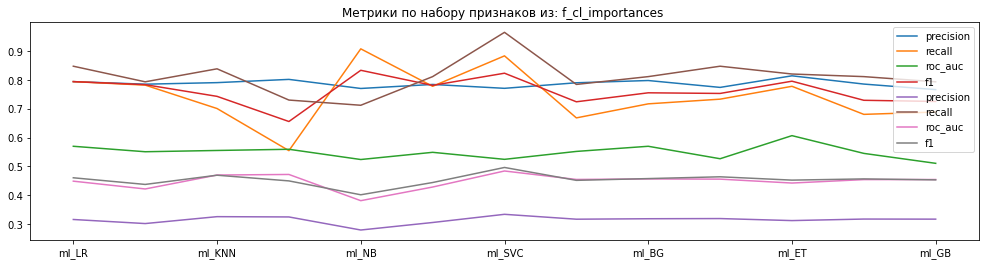

In [15]:
pd.DataFrame(ml_test_dict['f_cl_importances']).plot(title='Метрики по набору признаков из: f_cl_importances ', figsize=(17, 4))


Проверим метрики на стандартизированных признаках

In [16]:
def ml_ss_tester(X_train, X_test, y_train, y_test, features_list):
    """Функция проводит обучение на разных моделях, и возвращает метрики
    features_list - список признаков,
    
    """
    
    X_train = X_train[features_list]
    X_test = X_test[features_list]
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    metrixs_list = {}
    
    # Список моделей машинного обучения
    ml_LR = LogisticRegression( max_iter=2000, random_state=42)
    metrixs_list['ml_LR'] = ml_train(ml_LR, X_train, X_test, y_train, y_test)
    
    ml_LDA = LinearDiscriminantAnalysis()
    metrixs_list['ml_LDA'] = ml_train(ml_LDA, X_train, X_test, y_train, y_test)
    
    ml_KNN = KNeighborsClassifier()
    metrixs_list['ml_KNN'] = ml_train(ml_KNN, X_train, X_test, y_train, y_test)
    
    ml_CART = DecisionTreeClassifier(random_state=42)
    metrixs_list['ml_CART'] = ml_train(ml_CART, X_train, X_test, y_train, y_test)
    
    ml_NB = GaussianNB()
    metrixs_list['ml_NB'] = ml_train(ml_NB, X_train, X_test, y_train, y_test)
    
    ml_LSVC = LinearSVC(max_iter=100000, random_state=42)
    metrixs_list['ml_LSVC'] = ml_train(ml_LSVC, X_train, X_test, y_train, y_test)
    
    ml_SVC = SVC(random_state=42)
    metrixs_list['ml_SVC'] = ml_train(ml_SVC, X_train, X_test, y_train, y_test)
    
    ml_MLP = MLPClassifier(max_iter=2000, random_state=42)
    metrixs_list['ml_MLP'] = ml_train(ml_MLP, X_train, X_test, y_train, y_test)
    
    ml_BG = BaggingClassifier(n_estimators=100, random_state=42)
    metrixs_list['ml_BG'] = ml_train(ml_BG, X_train, X_test, y_train, y_test)
    
    ml_RF = RandomForestClassifier(n_estimators=100, random_state=42)
    metrixs_list['ml_RF'] = ml_train(ml_RF, X_train, X_test, y_train, y_test)
    
    ml_ET = ExtraTreesClassifier(n_estimators=100, random_state=42)
    metrixs_list['ml_ET'] = ml_train(ml_ET, X_train, X_test, y_train, y_test)
    
    ml_AB = AdaBoostClassifier(n_estimators=100, algorithm='SAMME', random_state=42)
    metrixs_list['ml_AB'] = ml_train(ml_AB, X_train, X_test, y_train, y_test)
    
    ml_GB = GradientBoostingClassifier(n_estimators=100, random_state=42)
    metrixs_list['ml_GB'] = ml_train(ml_GB, X_train, X_test, y_train, y_test)

    return metrixs_list

In [17]:
features_list = ['f_cl_importances', 'f_lr_importances', 'f_mi_importances', 'f_pi_f1_importances',
                 'f_pi_ra_importances', 'f_rfe_importances', 'fs_importances']
n=45 # Количество признаков

ml_test_stand_dict_ = {} # Словарь с метриками. Ключ: название метрики, Значение: Датафрейм с метриками

for feature in  features_list:
    print(f'Обучение стандартизированных данных на отборе {n} признаков из {feature}')
    metrixs_19_20 = ml_ss_tester(df_2019_full, df_2020_full, target_2019_01_full, target_2020_01_full, 
                          importances_feature_19[feature][:n])
    metrixs_20_21 = ml_ss_tester(df_2020_full, df_2021_full, target_2020_01_full, target_2021_01_full, 
                          importances_feature_20[feature][:n])
    
    df_metrixs_19_20 = pd.DataFrame(metrixs_19_20).T
    df_metrixs_20_21 = pd.DataFrame(metrixs_20_21).T
    df_metrixs_concatf = pd.concat([df_metrixs_19_20, df_metrixs_20_21], axis=1)
    ml_test_stand_dict_[feature] = df_metrixs_concatf
    display(df_metrixs_concatf)

Обучение стандартизированных данных на отборе 45 признаков из f_cl_importances


,conf_matrix,precision,recall,roc_auc,f1,conf_matrix,precision,recall,roc_auc,f1
ml_LR,"[[26, 52], [64, 183]]",0.78,0.74,0.54,0.76,"[[11, 203], [16, 95]]",0.32,0.86,0.45,0.46
ml_LDA,"[[25, 53], [54, 193]]",0.78,0.78,0.55,0.78,"[[11, 203], [23, 88]]",0.30,0.79,0.42,0.44
ml_KNN,"[[29, 49], [76, 171]]",0.78,0.69,0.53,0.73,"[[16, 198], [15, 96]]",0.33,0.86,0.47,0.47
ml_CART,"[[44, 34], [110, 137]]",0.80,0.55,0.56,0.66,"[[46, 168], [30, 81]]",0.33,0.73,0.47,0.45
ml_NB,"[[8, 70], [15, 232]]",0.77,0.94,0.52,0.85,"[[11, 203], [32, 79]]",0.28,0.71,0.38,0.40
ml_LSVC,"[[25, 53], [62, 185]]",0.78,0.75,0.53,0.76,"[[11, 203], [18, 93]]",0.31,0.84,0.44,0.46
ml_SVC,"[[23, 55], [41, 206]]",0.79,0.83,0.56,0.81,"[[2, 212], [5, 106]]",0.33,0.95,0.48,0.49
ml_MLP,"[[29, 49], [85, 162]]",0.77,0.66,0.51,0.71,"[[34, 180], [22, 89]]",0.33,0.80,0.48,0.47
ml_BG,"[[34, 44], [70, 177]]",0.80,0.72,0.58,0.76,"[[22, 192], [21, 90]]",0.32,0.81,0.46,0.46
ml_RF,"[[24, 54], [64, 183]]",0.77,0.74,0.52,0.76,"[[14, 200], [17, 94]]",0.32,0.85,0.46,0.46


Обучение стандартизированных данных на отборе 45 признаков из f_lr_importances


,conf_matrix,precision,recall,roc_auc,f1,conf_matrix,precision,recall,roc_auc,f1
ml_LR,"[[32, 46], [67, 180]]",0.80,0.73,0.57,0.76,"[[11, 203], [16, 95]]",0.32,0.86,0.45,0.46
ml_LDA,"[[32, 46], [68, 179]]",0.80,0.72,0.57,0.76,"[[11, 203], [23, 88]]",0.30,0.79,0.42,0.44
ml_KNN,"[[27, 51], [79, 168]]",0.77,0.68,0.51,0.72,"[[16, 198], [15, 96]]",0.33,0.86,0.47,0.47
ml_CART,"[[38, 40], [108, 139]]",0.78,0.56,0.53,0.65,"[[46, 168], [30, 81]]",0.33,0.73,0.47,0.45
ml_NB,"[[6, 72], [14, 233]]",0.76,0.94,0.51,0.84,"[[11, 203], [32, 79]]",0.28,0.71,0.38,0.40
ml_LSVC,"[[32, 46], [72, 175]]",0.79,0.71,0.56,0.75,"[[11, 203], [18, 93]]",0.31,0.84,0.44,0.46
ml_SVC,"[[21, 57], [51, 196]]",0.77,0.79,0.53,0.78,"[[2, 212], [5, 106]]",0.33,0.95,0.48,0.49
ml_MLP,"[[39, 39], [95, 152]]",0.80,0.62,0.56,0.69,"[[34, 180], [22, 89]]",0.33,0.80,0.48,0.47
ml_BG,"[[30, 48], [59, 188]]",0.80,0.76,0.57,0.78,"[[22, 192], [21, 90]]",0.32,0.81,0.46,0.46
ml_RF,"[[28, 50], [56, 191]]",0.79,0.77,0.57,0.78,"[[14, 200], [17, 94]]",0.32,0.85,0.46,0.46


Обучение стандартизированных данных на отборе 45 признаков из f_mi_importances


,conf_matrix,precision,recall,roc_auc,f1,conf_matrix,precision,recall,roc_auc,f1
ml_LR,"[[35, 43], [67, 180]]",0.81,0.73,0.59,0.77,"[[11, 203], [16, 95]]",0.32,0.86,0.45,0.46
ml_LDA,"[[30, 48], [59, 188]]",0.80,0.76,0.57,0.78,"[[11, 203], [23, 88]]",0.30,0.79,0.42,0.44
ml_KNN,"[[30, 48], [70, 177]]",0.79,0.72,0.55,0.75,"[[16, 198], [15, 96]]",0.33,0.86,0.47,0.47
ml_CART,"[[33, 45], [95, 152]]",0.77,0.62,0.52,0.68,"[[46, 168], [30, 81]]",0.33,0.73,0.47,0.45
ml_NB,"[[24, 54], [57, 190]]",0.78,0.77,0.54,0.77,"[[11, 203], [32, 79]]",0.28,0.71,0.38,0.40
ml_LSVC,"[[34, 44], [67, 180]]",0.80,0.73,0.58,0.76,"[[11, 203], [18, 93]]",0.31,0.84,0.44,0.46
ml_SVC,"[[13, 65], [35, 212]]",0.77,0.86,0.51,0.81,"[[2, 212], [5, 106]]",0.33,0.95,0.48,0.49
ml_MLP,"[[39, 39], [81, 166]]",0.81,0.67,0.59,0.73,"[[34, 180], [22, 89]]",0.33,0.80,0.48,0.47
ml_BG,"[[32, 46], [61, 186]]",0.80,0.75,0.58,0.78,"[[22, 192], [21, 90]]",0.32,0.81,0.46,0.46
ml_RF,"[[30, 48], [59, 188]]",0.80,0.76,0.57,0.78,"[[14, 200], [17, 94]]",0.32,0.85,0.46,0.46


Обучение стандартизированных данных на отборе 45 признаков из f_pi_f1_importances


,conf_matrix,precision,recall,roc_auc,f1,conf_matrix,precision,recall,roc_auc,f1
ml_LR,"[[23, 55], [64, 183]]",0.77,0.74,0.52,0.75,"[[11, 203], [16, 95]]",0.32,0.86,0.45,0.46
ml_LDA,"[[25, 53], [58, 189]]",0.78,0.77,0.54,0.77,"[[11, 203], [23, 88]]",0.30,0.79,0.42,0.44
ml_KNN,"[[30, 48], [57, 190]]",0.80,0.77,0.58,0.78,"[[16, 198], [15, 96]]",0.33,0.86,0.47,0.47
ml_CART,"[[39, 39], [96, 151]]",0.79,0.61,0.56,0.69,"[[46, 168], [30, 81]]",0.33,0.73,0.47,0.45
ml_NB,"[[21, 57], [46, 201]]",0.78,0.81,0.54,0.80,"[[11, 203], [32, 79]]",0.28,0.71,0.38,0.40
ml_LSVC,"[[25, 53], [65, 182]]",0.77,0.74,0.53,0.76,"[[11, 203], [18, 93]]",0.31,0.84,0.44,0.46
ml_SVC,"[[10, 68], [39, 208]]",0.75,0.84,0.49,0.80,"[[2, 212], [5, 106]]",0.33,0.95,0.48,0.49
ml_MLP,"[[35, 43], [97, 150]]",0.78,0.61,0.53,0.68,"[[34, 180], [22, 89]]",0.33,0.80,0.48,0.47
ml_BG,"[[31, 47], [77, 170]]",0.78,0.69,0.54,0.73,"[[22, 192], [21, 90]]",0.32,0.81,0.46,0.46
ml_RF,"[[25, 53], [64, 183]]",0.78,0.74,0.53,0.76,"[[14, 200], [17, 94]]",0.32,0.85,0.46,0.46


Обучение стандартизированных данных на отборе 45 признаков из f_pi_ra_importances


,conf_matrix,precision,recall,roc_auc,f1,conf_matrix,precision,recall,roc_auc,f1
ml_LR,"[[25, 53], [57, 190]]",0.78,0.77,0.54,0.78,"[[11, 203], [16, 95]]",0.32,0.86,0.45,0.46
ml_LDA,"[[23, 55], [52, 195]]",0.78,0.79,0.54,0.78,"[[11, 203], [23, 88]]",0.30,0.79,0.42,0.44
ml_KNN,"[[31, 47], [71, 176]]",0.79,0.71,0.56,0.75,"[[16, 198], [15, 96]]",0.33,0.86,0.47,0.47
ml_CART,"[[40, 38], [92, 155]]",0.80,0.63,0.57,0.70,"[[46, 168], [30, 81]]",0.33,0.73,0.47,0.45
ml_NB,"[[18, 60], [47, 200]]",0.77,0.81,0.52,0.79,"[[11, 203], [32, 79]]",0.28,0.71,0.38,0.40
ml_LSVC,"[[25, 53], [58, 189]]",0.78,0.77,0.54,0.77,"[[11, 203], [18, 93]]",0.31,0.84,0.44,0.46
ml_SVC,"[[12, 66], [29, 218]]",0.77,0.88,0.52,0.82,"[[2, 212], [5, 106]]",0.33,0.95,0.48,0.49
ml_MLP,"[[34, 44], [78, 169]]",0.79,0.68,0.56,0.73,"[[34, 180], [22, 89]]",0.33,0.80,0.48,0.47
ml_BG,"[[31, 47], [74, 173]]",0.79,0.70,0.55,0.74,"[[22, 192], [21, 90]]",0.32,0.81,0.46,0.46
ml_RF,"[[33, 45], [57, 190]]",0.81,0.77,0.60,0.79,"[[14, 200], [17, 94]]",0.32,0.85,0.46,0.46


Обучение стандартизированных данных на отборе 45 признаков из f_rfe_importances


,conf_matrix,precision,recall,roc_auc,f1,conf_matrix,precision,recall,roc_auc,f1
ml_LR,"[[25, 53], [53, 194]]",0.79,0.79,0.55,0.79,"[[11, 203], [16, 95]]",0.32,0.86,0.45,0.46
ml_LDA,"[[26, 52], [54, 193]]",0.79,0.78,0.56,0.78,"[[11, 203], [23, 88]]",0.30,0.79,0.42,0.44
ml_KNN,"[[34, 44], [73, 174]]",0.80,0.70,0.57,0.75,"[[16, 198], [15, 96]]",0.33,0.86,0.47,0.47
ml_CART,"[[38, 40], [102, 145]]",0.78,0.59,0.54,0.67,"[[46, 168], [30, 81]]",0.33,0.73,0.47,0.45
ml_NB,"[[22, 56], [43, 204]]",0.78,0.83,0.55,0.80,"[[11, 203], [32, 79]]",0.28,0.71,0.38,0.40
ml_LSVC,"[[26, 52], [58, 189]]",0.78,0.77,0.55,0.77,"[[11, 203], [18, 93]]",0.31,0.84,0.44,0.46
ml_SVC,"[[15, 63], [32, 215]]",0.77,0.87,0.53,0.82,"[[2, 212], [5, 106]]",0.33,0.95,0.48,0.49
ml_MLP,"[[38, 40], [76, 171]]",0.81,0.69,0.59,0.75,"[[34, 180], [22, 89]]",0.33,0.80,0.48,0.47
ml_BG,"[[30, 48], [68, 179]]",0.79,0.72,0.55,0.76,"[[22, 192], [21, 90]]",0.32,0.81,0.46,0.46
ml_RF,"[[29, 49], [51, 196]]",0.80,0.79,0.58,0.80,"[[14, 200], [17, 94]]",0.32,0.85,0.46,0.46


Обучение стандартизированных данных на отборе 45 признаков из fs_importances


,conf_matrix,precision,recall,roc_auc,f1,conf_matrix,precision,recall,roc_auc,f1
ml_LR,"[[28, 50], [66, 181]]",0.78,0.73,0.55,0.76,"[[11, 203], [16, 95]]",0.32,0.86,0.45,0.46
ml_LDA,"[[25, 53], [61, 186]]",0.78,0.75,0.54,0.77,"[[11, 203], [23, 88]]",0.30,0.79,0.42,0.44
ml_KNN,"[[23, 55], [66, 181]]",0.77,0.73,0.51,0.75,"[[16, 198], [15, 96]]",0.33,0.86,0.47,0.47
ml_CART,"[[39, 39], [98, 149]]",0.79,0.60,0.55,0.69,"[[46, 168], [30, 81]]",0.33,0.73,0.47,0.45
ml_NB,"[[25, 53], [55, 192]]",0.78,0.78,0.55,0.78,"[[11, 203], [32, 79]]",0.28,0.71,0.38,0.40
ml_LSVC,"[[30, 48], [62, 185]]",0.79,0.75,0.57,0.77,"[[11, 203], [18, 93]]",0.31,0.84,0.44,0.46
ml_SVC,"[[17, 61], [32, 215]]",0.78,0.87,0.54,0.82,"[[2, 212], [5, 106]]",0.33,0.95,0.48,0.49
ml_MLP,"[[44, 34], [94, 153]]",0.82,0.62,0.59,0.71,"[[34, 180], [22, 89]]",0.33,0.80,0.48,0.47
ml_BG,"[[24, 54], [66, 181]]",0.77,0.73,0.52,0.75,"[[22, 192], [21, 90]]",0.32,0.81,0.46,0.46
ml_RF,"[[27, 51], [54, 193]]",0.79,0.78,0.56,0.79,"[[14, 200], [17, 94]]",0.32,0.85,0.46,0.46


К улучшению качества это не привело. Верхние (яркие, 4 шт) метрики это 2019 => 2020, нижние (пастельные, 4 шт) 2020 => 2021

D:\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Метрики на стандартизированных данных по набору признаков из: f_lr_importances'}>

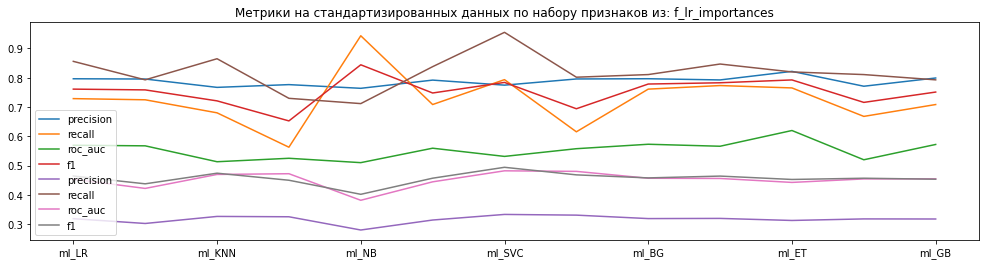

In [18]:
pd.DataFrame(ml_test_stand_dict_['f_lr_importances']).plot(title='Метрики на стандартизированных данных по набору признаков из: f_lr_importances', 
                                                           figsize=(17, 4))

**Никак не дается мне 2021 год. Точность (precision) прогноза низкая. Попробую обучить и проверить на 2021.**

In [19]:
metrixs_21_21_fs = ml_ss_tester(df_2021_full, df_2021_full, target_2021_01_full, target_2021_01_full, 
                          importances_feature_20['f_lr_importances'][:50])

df_metrixs_21_21_fs = pd.DataFrame(metrixs_21_21_fs).T
df_metrixs_21_21_fs

,conf_matrix,precision,recall,roc_auc,f1
ml_LR,"[[199, 15], [52, 59]]",0.80,0.53,0.73,0.64
ml_LDA,"[[203, 11], [55, 56]]",0.84,0.50,0.73,0.63
ml_KNN,"[[200, 14], [61, 50]]",0.78,0.45,0.69,0.57
ml_CART,"[[214, 0], [0, 111]]",1.00,1.00,1.00,1.00
ml_NB,"[[197, 17], [69, 42]]",0.71,0.38,0.65,0.49
ml_LSVC,"[[202, 12], [49, 62]]",0.84,0.56,0.75,0.67
ml_SVC,"[[210, 4], [51, 60]]",0.94,0.54,0.76,0.69
ml_MLP,"[[214, 0], [0, 111]]",1.00,1.00,1.00,1.00
ml_BG,"[[214, 0], [0, 111]]",1.00,1.00,1.00,1.00
ml_RF,"[[214, 0], [0, 111]]",1.00,1.00,1.00,1.00


У половины моделей 100% попадание - отсюда вывод - взаимосвязи находит (или переобучилась). Так как за период 2019-2020, которые есть в выборке 2021 года экономическая ситуация в стране поменялась, то модели обучаясь на предыдущих (блолее) стабильных периодах не могут предсказать достаточно точно ситуацию 2021 года.

Чтоб добиться каких-либо лучших результатов по предсказаниям на 2021 необходимо корректировать признаки на внешнее влияние (умножать на экономические коэффициенты (может инфляция), добавлять регионы и пр. - этот вопрос не изучала) 

In [20]:
pay = {}
pay['t_2019'] = dict(target_2019_01_full.value_counts())
pay['t_2020'] = dict(target_2020_01_full.value_counts())
pay['t_2021'] = dict(target_2021_01_full.value_counts())

pd.DataFrame(pay)


,t_2019,t_2020,t_2021
1,195,247,111
0,130,78,214


Модели ML, при прогнозе на 2021 год, очень много контрагентов относят к должникам, хотя они уже исправились. Но это произошло в 2021 году (в табличке выше приведены данные), а обучается и тестится она на 2017-2020. Поэтому такой вариант.

А сократилось количество должников больше, чем в 2 раза. Было в 2020 - 247, а стало в 2021 - 111. Да и в 2019 году тоже неплательщиков много по сравнению в 2021.

Это модель не в состоянии спрогнозировать.

**Как идея - попробуем обучить модели на df_2019, а предсказать на 2021, так как он по соотношению целевых переменных ближе к показателям 2021.** 

In [21]:
metrixs_21_21_fs = ml_ss_tester(df_2019_full, df_2021_full, target_2019_01_full, target_2021_01_full, 
                          importances_feature_20['f_rfe_importances'][:50])

df_metrixs_21_21_fs = pd.DataFrame(metrixs_21_21_fs).T
df_metrixs_21_21_fs

,conf_matrix,precision,recall,roc_auc,f1
ml_LR,"[[38, 176], [26, 85]]",0.33,0.77,0.47,0.46
ml_LDA,"[[39, 175], [24, 87]]",0.33,0.78,0.48,0.47
ml_KNN,"[[61, 153], [32, 79]]",0.34,0.71,0.50,0.46
ml_CART,"[[92, 122], [43, 68]]",0.36,0.61,0.52,0.45
ml_NB,"[[26, 188], [15, 96]]",0.34,0.86,0.49,0.49
ml_LSVC,"[[39, 175], [28, 83]]",0.32,0.75,0.47,0.45
ml_SVC,"[[16, 198], [7, 104]]",0.34,0.94,0.51,0.50
ml_MLP,"[[70, 144], [43, 68]]",0.32,0.61,0.47,0.42
ml_BG,"[[53, 161], [33, 78]]",0.33,0.70,0.48,0.45
ml_RF,"[[38, 176], [24, 87]]",0.33,0.78,0.48,0.47


Не помогло, точность такая же низкая. 

**Рассмотрим какие признаки каждая модель считает наиболее важными, для этого дадим модели все признаки и посмотрим, что она выбирет**

In [22]:
# Будем рассматривать i признаков на выборке feat на data и target

feat = 'f_lr_importances'
i = 15 # количество наиболее важных признаков для отбора
data = df_2020_full
target = target_2020_01_full

# Данные будем собирать в словарь
selection_feature_of_models = {} 

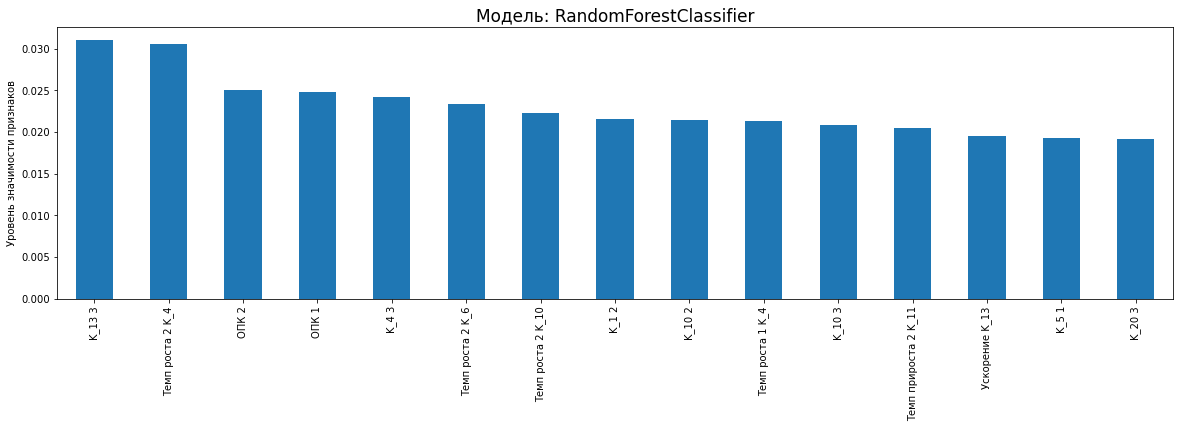

In [23]:
model_RF = RandomForestClassifier(random_state=42)
model_RF.fit(data[importances_feature_20[feat]], target)
RF_feaches = pd.Series(model_RF.feature_importances_)
RF_feaches.index = data[importances_feature_20[feat]].columns
RF_feaches = RF_feaches.sort_values(ascending=False)
selection_feature_of_models['RandomForestClassifier'] = RF_feaches

RF_feaches[:i].plot.bar(figsize=(20,5))
plt.ylabel('Уровень значимости признаков')
plt.title('Модель: RandomForestClassifier', fontsize = 17)
plt.show()



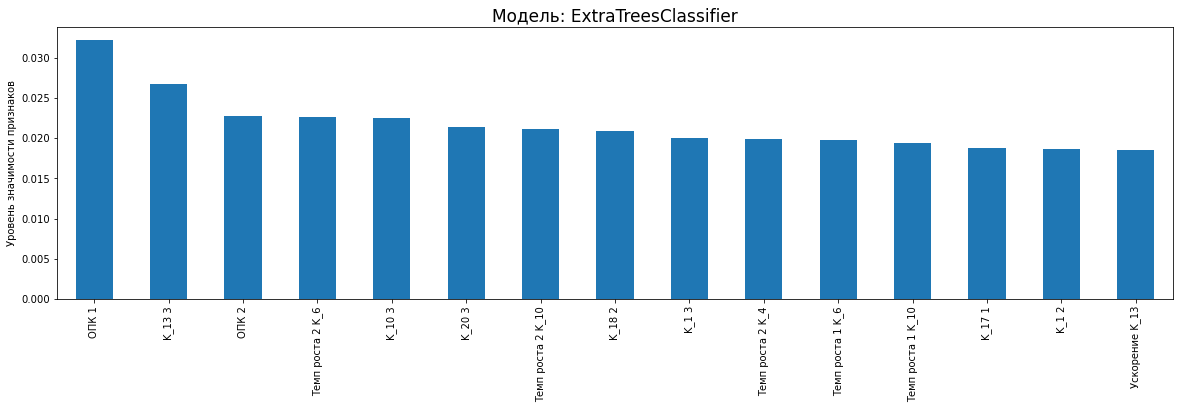

In [24]:
model_ET = ExtraTreesClassifier(n_estimators=100, random_state=42)
model_ET.fit(data[importances_feature_20[feat]], target)
ET_feaches = pd.Series(model_ET.feature_importances_)
ET_feaches.index = data[importances_feature_20[feat]].columns
ET_feaches = ET_feaches.sort_values(ascending=False)
selection_feature_of_models['ExtraTreesClassifier'] = ET_feaches

ET_feaches[:i].plot.bar(figsize=(20,5))
plt.ylabel('Уровень значимости признаков')
plt.title('Модель: ExtraTreesClassifier', fontsize = 17)
plt.show()

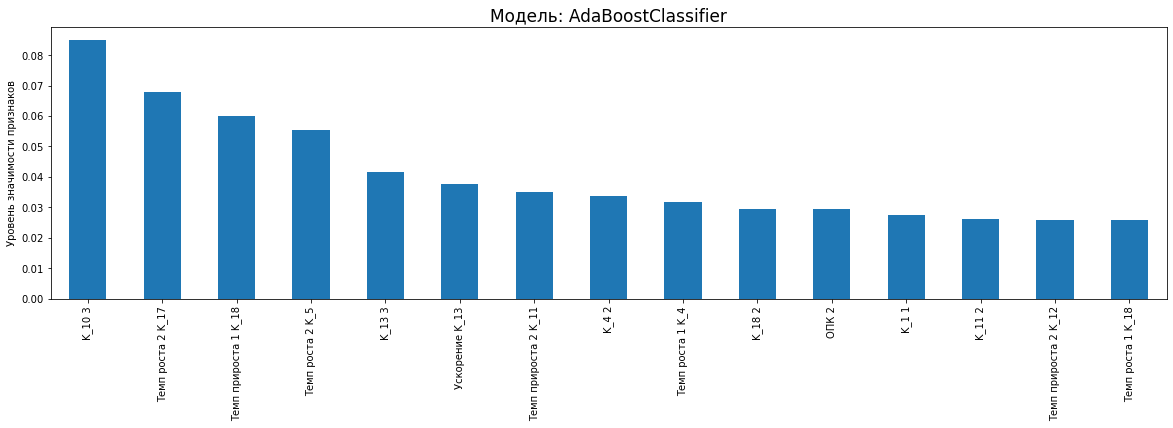

In [25]:
model_AB = AdaBoostClassifier(n_estimators=100, algorithm='SAMME', random_state=42)
model_AB.fit(data[importances_feature_20[feat]], target)
AB_feaches = pd.Series(model_AB.feature_importances_)
AB_feaches.index = data[importances_feature_20[feat]].columns
AB_feaches = AB_feaches.sort_values(ascending=False)
selection_feature_of_models['AdaBoostClassifier'] = AB_feaches

AB_feaches[:i].plot.bar(figsize=(20,5))
plt.ylabel('Уровень значимости признаков')
plt.title('Модель: AdaBoostClassifier', fontsize = 17)
plt.show()    

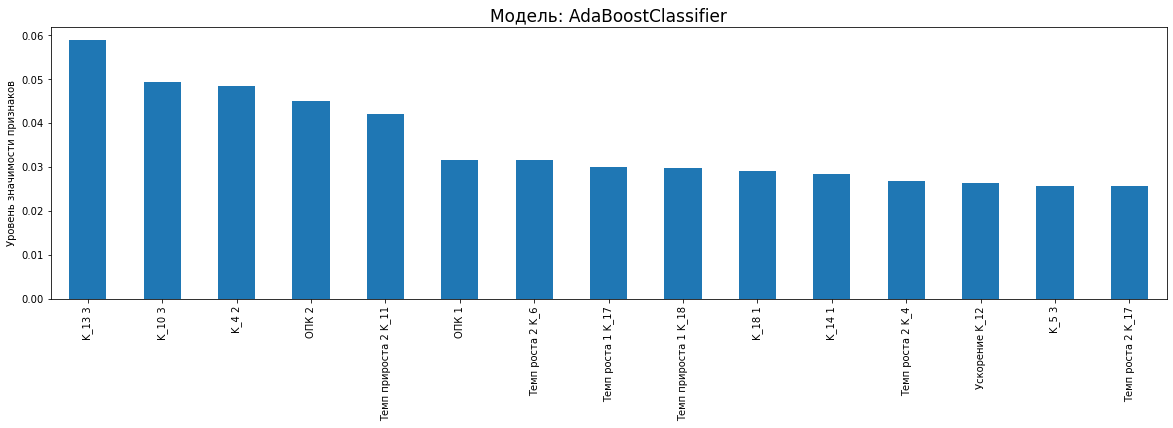

In [26]:
model_GB = GradientBoostingClassifier(n_estimators=100, random_state=42)
model_GB.fit(data[importances_feature_20[feat]], target)
GB_feaches = pd.Series(model_GB.feature_importances_)
GB_feaches.index = data[importances_feature_20[feat]].columns
GB_feaches = GB_feaches.sort_values(ascending=False)
selection_feature_of_models['GradientBoostingClassifier'] = GB_feaches

GB_feaches[:i].plot.bar(figsize=(20,5))
plt.ylabel('Уровень значимости признаков')
plt.title('Модель: AdaBoostClassifier', fontsize = 17)
plt.show()   

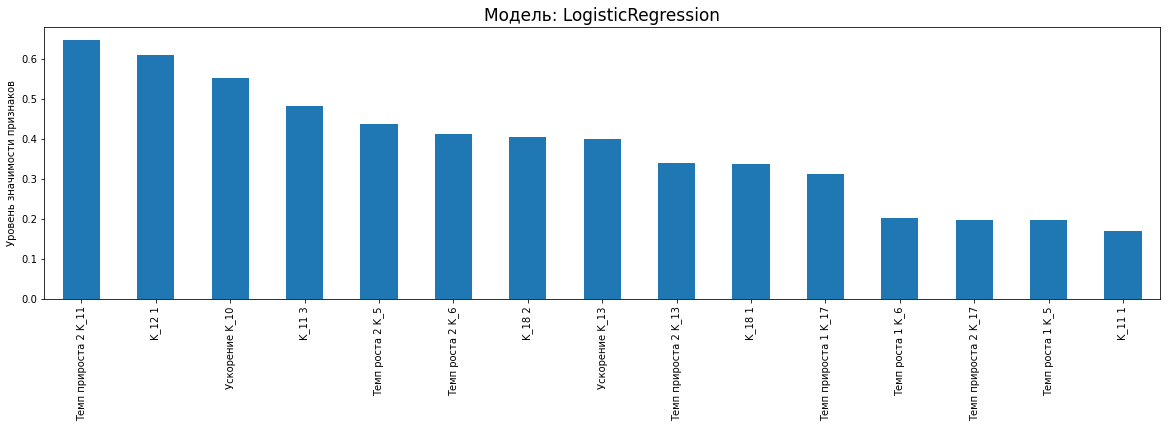

In [27]:
model_LR = LogisticRegression( max_iter=2000, random_state=42)
model_LR.fit(data[importances_feature_20[feat]], target)
LR_feaches = pd.Series(model_LR.coef_[0])
LR_feaches.index = data[importances_feature_20[feat]].columns
LR_feaches = LR_feaches.sort_values(ascending=False)
selection_feature_of_models['LogisticRegression'] = LR_feaches

LR_feaches[:i].plot.bar(figsize=(20,5))
plt.ylabel('Уровень значимости признаков')
plt.title('Модель: LogisticRegression', fontsize = 17)
plt.show() 

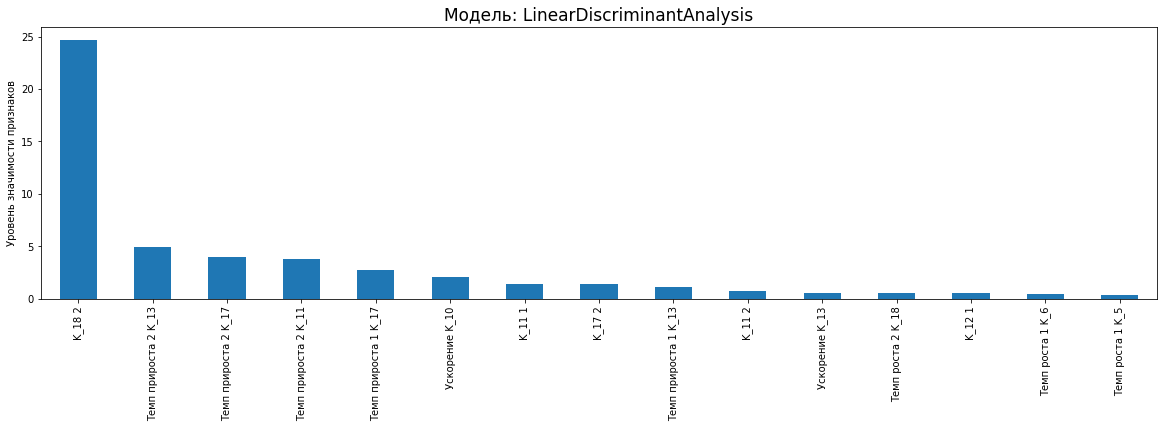

In [28]:
model_LDA = LinearDiscriminantAnalysis()
model_LDA.fit(data[importances_feature_20[feat]], target)
LDA_feaches = pd.Series(model_LDA.coef_[0])
LDA_feaches.index = data[importances_feature_20[feat]].columns
LDA_feaches = LDA_feaches.sort_values(ascending=False)
selection_feature_of_models['LinearDiscriminantAnalysis'] = LDA_feaches

LDA_feaches[:i].plot.bar(figsize=(20,5))
plt.ylabel('Уровень значимости признаков')
plt.title('Модель: LinearDiscriminantAnalysis', fontsize = 17)
plt.show() 

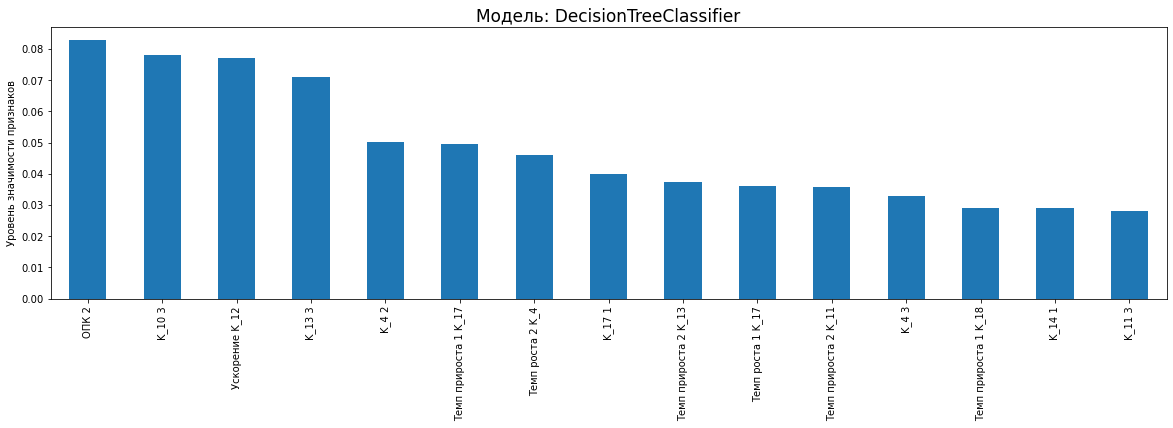

In [29]:
model_CART = DecisionTreeClassifier(random_state=42)
model_CART.fit(data[importances_feature_20[feat]], target)
CART_feaches = pd.Series(model_CART.feature_importances_)
CART_feaches.index = data[importances_feature_20[feat]].columns
CART_feaches = CART_feaches.sort_values(ascending=False)
selection_feature_of_models['DecisionTreeClassifier'] = CART_feaches

CART_feaches[:i].plot.bar(figsize=(20,5))
plt.ylabel('Уровень значимости признаков')
plt.title('Модель: DecisionTreeClassifier', fontsize = 17)
plt.show()

D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


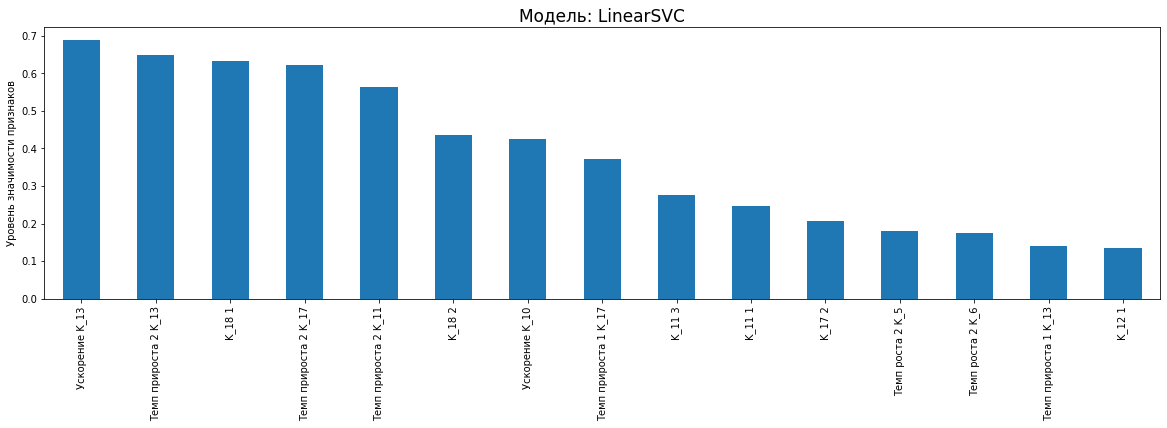

In [30]:
model_LSVC = LinearSVC(max_iter=100000, random_state=42)
model_LSVC.fit(data[importances_feature_20[feat]], target)
LSVC_feaches = pd.Series(model_LSVC.coef_[0])
LSVC_feaches.index = data[importances_feature_20[feat]].columns
LSVC_feaches = LSVC_feaches.sort_values(ascending=False)
selection_feature_of_models['LinearSVC'] = LSVC_feaches

LSVC_feaches[:i].plot.bar(figsize=(20,5))
plt.ylabel('Уровень значимости признаков')
plt.title('Модель: LinearSVC', fontsize = 17)
plt.show()

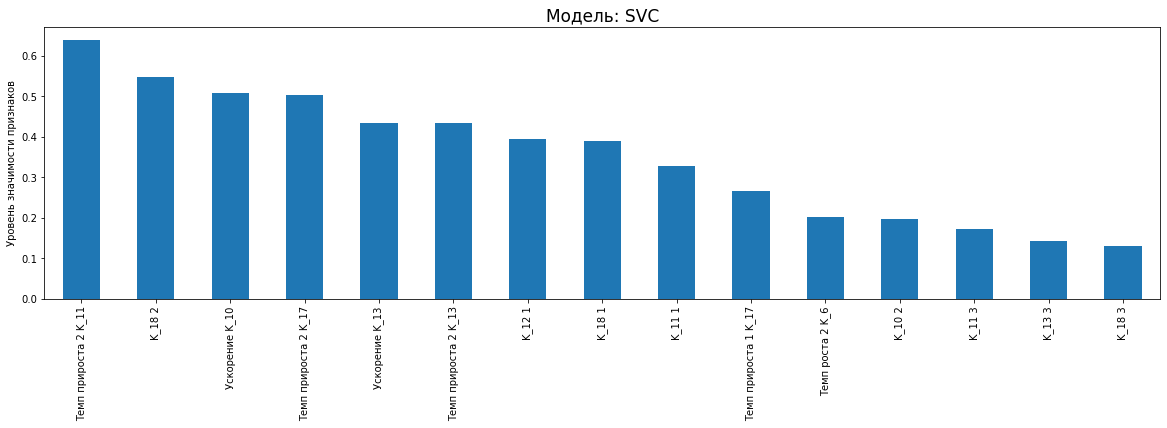

In [31]:
model_SVC = SVC(kernel='linear', random_state=42)
model_SVC.fit(data[importances_feature_20[feat]], target)
SVC_feaches = pd.Series(model_SVC.coef_[0])
SVC_feaches.index = data[importances_feature_20[feat]].columns
SVC_feaches = SVC_feaches.sort_values(ascending=False)
selection_feature_of_models['SVC'] = SVC_feaches

SVC_feaches[:i].plot.bar(figsize=(20,5))
plt.ylabel('Уровень значимости признаков')
plt.title('Модель: SVC', fontsize = 17)
plt.show()  

In [32]:
selection_feature = []
for key, value in selection_feature_of_models.items():
    selection_feature = selection_feature + list(value.index[:i])
 

In [33]:
selection_feature = dict((x, selection_feature.count(x)) for x in set(selection_feature) if selection_feature.count(x) > 1)

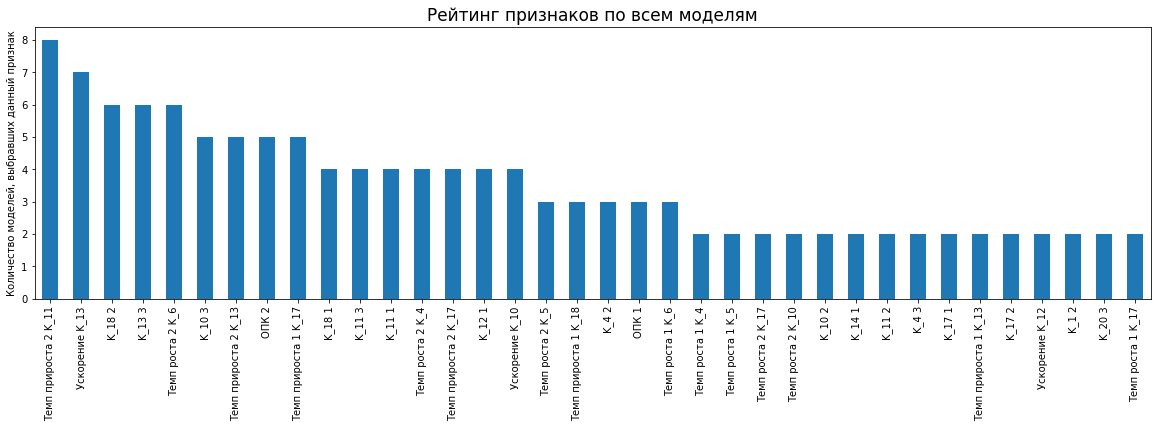

In [34]:
rating_feature = pd.Series(selection_feature).sort_values(ascending=False)
rating_feature.plot.bar(figsize=(20,5))
plt.ylabel('Количество моделей, выбравших данный признак')
plt.title('Рейтинг признаков по всем моделям', fontsize = 17)
plt.show()  